# <b>CONSUMO DE ENERGÍA ELÉCTRICA

In [1]:
# Librerias necesarias
# ==============================================================
import numpy as np
import pandas as pd
from pandas import Grouper
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
import warnings
plt.style.use('ggplot')

%matplotlib inline

warnings.filterwarnings("ignore")

In [2]:
# Carga de los datos 
AEP = pd.read_csv('datasets/AEP_hourly.csv', header=0, index_col=0, parse_dates=True,
squeeze=True)

### <b>Exploratory Analysis

In [3]:
AEP.sort_index(inplace=True)
AEP

Datetime
2004-10-01 01:00:00    12379.0
2004-10-01 02:00:00    11935.0
2004-10-01 03:00:00    11692.0
2004-10-01 04:00:00    11597.0
2004-10-01 05:00:00    11681.0
                        ...   
2018-08-02 20:00:00    17673.0
2018-08-02 21:00:00    17303.0
2018-08-02 22:00:00    17001.0
2018-08-02 23:00:00    15964.0
2018-08-03 00:00:00    14809.0
Name: AEP_MW, Length: 121273, dtype: float64

In [4]:
print(AEP.size)
print(AEP.dtypes)

121273
float64


In [5]:
AEP.describe()

count    121273.000000
mean      15499.513717
std        2591.399065
min        9581.000000
25%       13630.000000
50%       15310.000000
75%       17200.000000
max       25695.000000
Name: AEP_MW, dtype: float64

In [6]:
AEP[AEP.index.duplicated()]

Datetime
2014-11-02 02:00:00    13190.0
2015-11-01 02:00:00    10542.0
2016-11-06 02:00:00    11008.0
2017-11-05 02:00:00    10446.0
Name: AEP_MW, dtype: float64

In [7]:
# Valores nulos
AEP.isnull().sum()

0

In [8]:
AEP.dtype

dtype('float64')

In [9]:
aep_df = pd.DataFrame(AEP)

def extractTime(df):
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['weekday'] = df.index.weekday
    df['hour'] = df.index.hour
    return df

aep_df = extractTime(aep_df)
aep_df.sample(5)

,AEP_MW,year,month,weekday,hour
Datetime,,,,,
2009-07-23 05:00:00,12245.0,2009,7,3,5
2008-09-27 21:00:00,15385.0,2008,9,5,21
2009-03-14 22:00:00,15422.0,2009,3,5,22
2012-11-20 19:00:00,16125.0,2012,11,1,19
2006-11-23 21:00:00,13627.0,2006,11,3,21


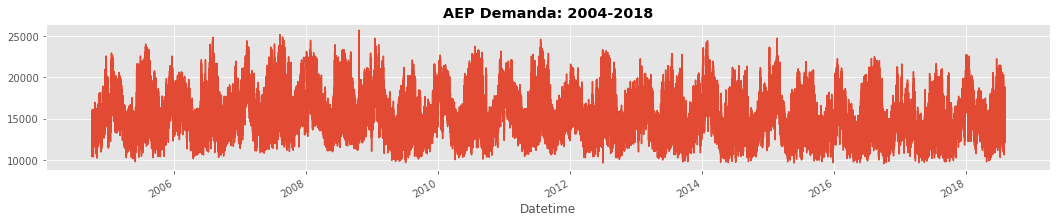

In [10]:
plt.title('AEP Demanda: 2004-2018',fontweight='bold')
aep_df.AEP_MW.plot(figsize=(18,3))
plt.show()

### Demanda por año

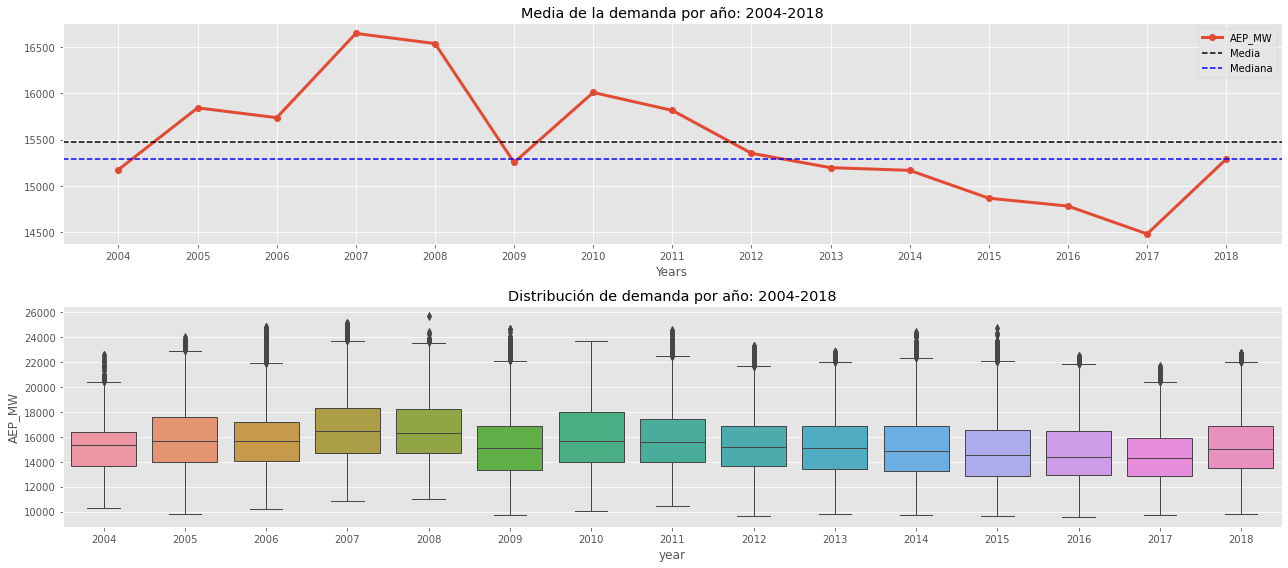

In [11]:
AEP_by_year = AEP.groupby(AEP.index.year).mean()
aep_yearly = aep_df.groupby('year')['AEP_MW'].mean()

fig, ax = plt.subplots(2,1, figsize=(18,8))

ax[0].set_title('Media de la demanda por año: 2004-2018')
AEP_by_year.plot(linewidth=3, marker='o', ax=ax[0])
ax[0].axhline(aep_yearly.mean(), linestyle='--', color='black', label='Media')
ax[0].axhline(aep_yearly.median(), linestyle='--', color='blue', label='Mediana')
plt.setp(ax[0], xticks=range(2004,2019))
ax[0].set_xlabel('Years')
ax[0].legend()

ax[1].set_title('Distribución de demanda por año: 2004-2018')
sns.boxplot(x='year', y='AEP_MW', data=aep_df, linewidth=1)

plt.tight_layout()
plt.show()

### Demanda por período

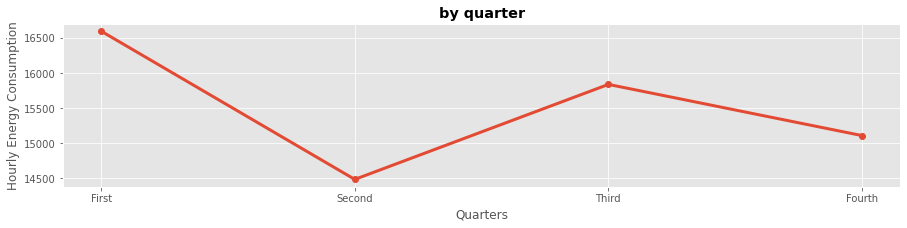

In [12]:
AEP_by_quarter = AEP.groupby(AEP.index.quarter).mean()

plt.title('by quarter', fontweight='bold')
AEP_by_quarter.plot(figsize=(15,3), linewidth=3, marker='o')
plt.xticks(range(1,5), labels=['First','Second','Third','Fourth'])
plt.xlabel('Quarters')
plt.ylabel('Hourly Energy Consumption')
plt.show()

### by month

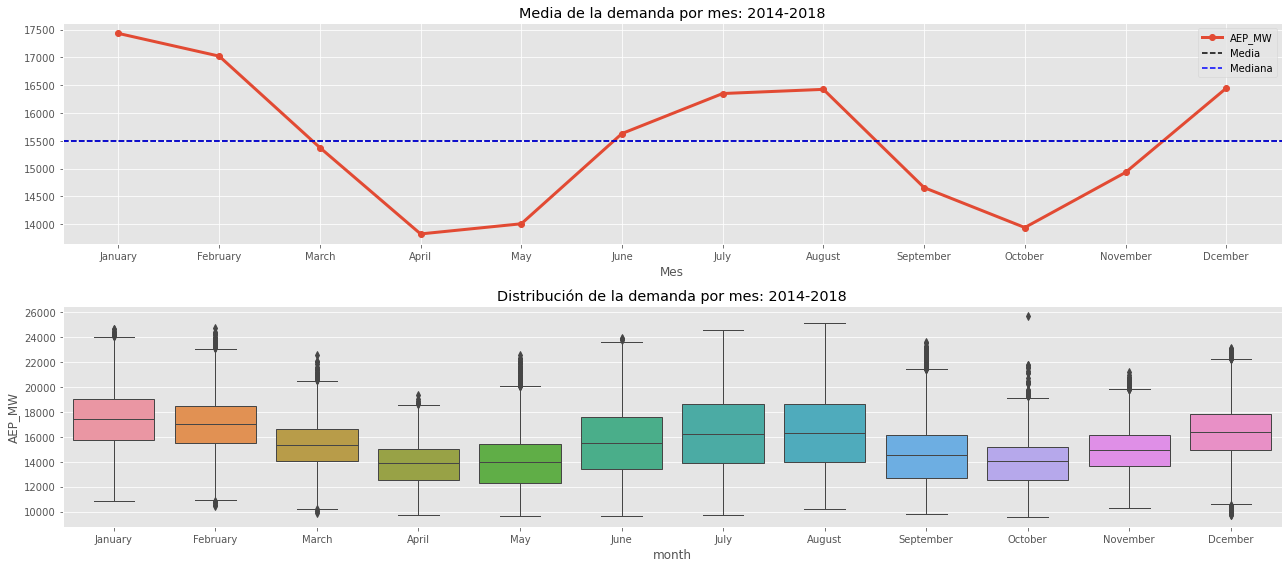

In [13]:
AEP_monthly = AEP.groupby(AEP.index.month).mean()
month_names = ['January','February','March','April','May','June', 'July',
              'August','September','October','November','Dcember']

fig, ax = plt.subplots(2,1, figsize=(18,8))
ax[0].set_title('Media de la demanda por mes: 2014-2018')
AEP_monthly.plot(linewidth=3, marker='o', ax=ax[0])
ax[0].axhline(AEP_monthly.mean(), color='black', linestyle='--', label='Media')
ax[0].axhline(AEP_monthly.median(), color='blue', linestyle='--', label='Mediana')
ax[0].set_xlabel('Mes')
plt.setp(ax[0], xticks=range(1,13), xticklabels=month_names)
ax[0].legend()

ax[1].set_title('Distribución de la demanda por mes: 2014-2018')
sns.boxplot(x='month', y='AEP_MW', data=aep_df, linewidth=1, ax=ax[1])
plt.setp(ax[1], xticks=range(0,12), xticklabels=month_names)

plt.tight_layout()
plt.show()

### <b> Demanda por día de semana

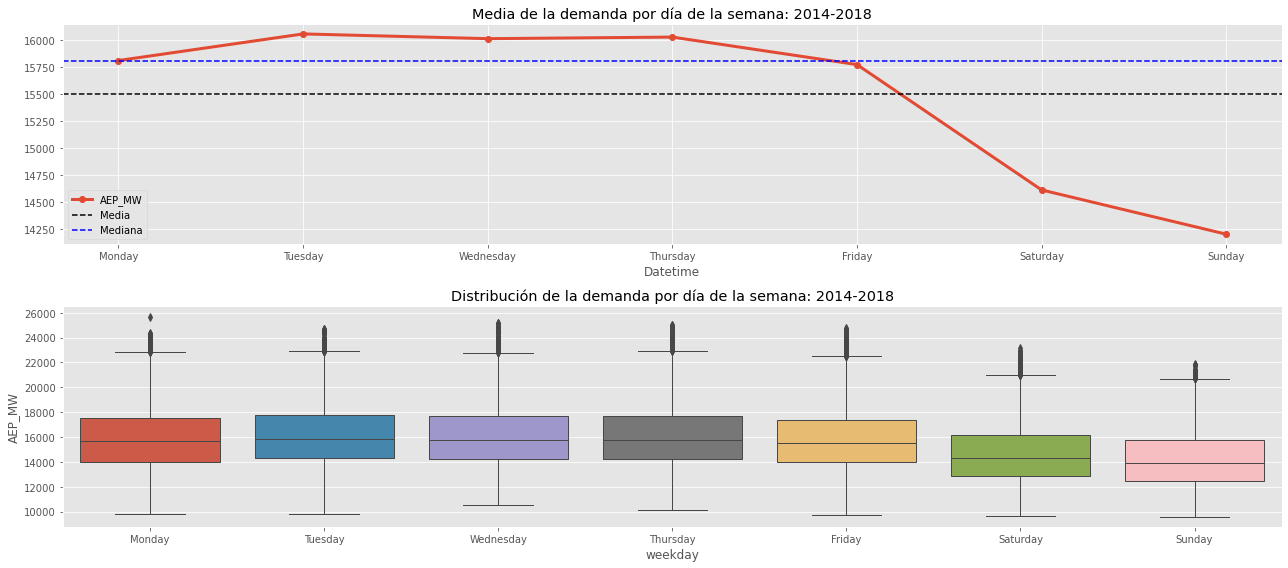

In [14]:
AEP_by_weekday = AEP.groupby(AEP.index.weekday).mean()
day_names = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

fig, ax = plt.subplots(2,1, figsize=(18,8))

ax[0].set_title('Media de la demanda por día de la semana: 2014-2018')
AEP_by_weekday.plot(linewidth=3, marker='o', ax=ax[0])
ax[0].axhline(AEP_by_weekday.mean(), color='black', linestyle='--', label='Media')
ax[0].axhline(AEP_by_weekday.median(), color='blue', linestyle='--', label='Mediana')
plt.setp(ax[0], xticks=range(0,7), xticklabels=day_names)
ax[0].legend()

ax[1].set_title('Distribución de la demanda por día de la semana: 2014-2018')
sns.boxplot(x='weekday', y='AEP_MW', data=aep_df, linewidth=1, ax=ax[1])
plt.setp(ax[1], xticks=range(0,7), xticklabels=day_names)

plt.tight_layout()
plt.show()

### <b>Consumo por hora

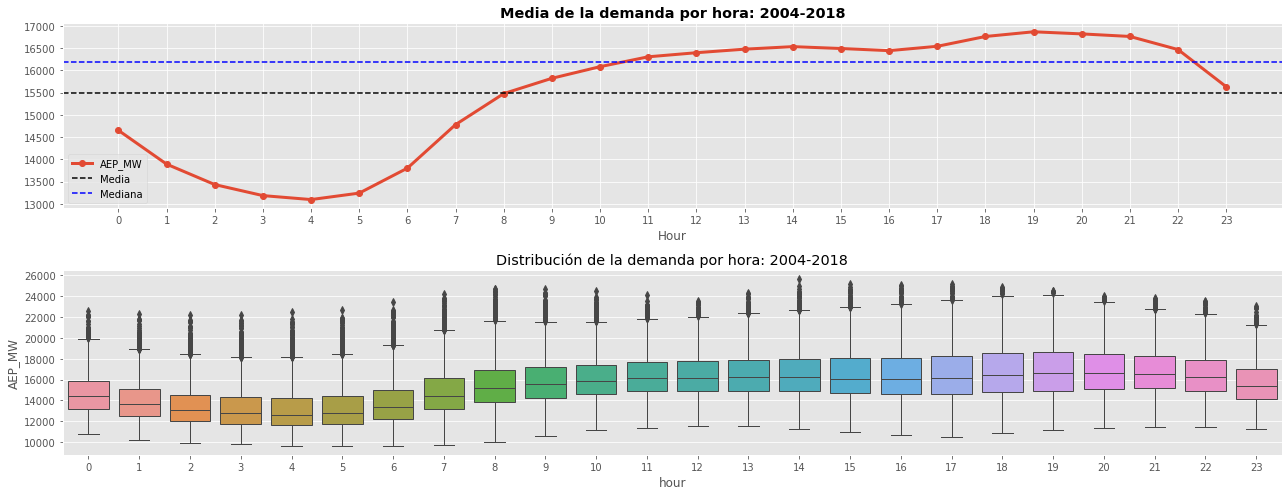

In [15]:
aep_hourly = aep_df.groupby('hour')['AEP_MW'].mean()

fig, ax = plt.subplots(2,1, figsize=(18,7))
 
ax[0].set_title('Media de la demanda por hora: 2004-2018', fontweight='bold')
aep_hourly.plot(linewidth=3, marker='o', ax=ax[0])
ax[0].axhline(aep_hourly.mean(), linestyle='--', color='black', label='Media')
ax[0].axhline(aep_hourly.median(), linestyle='--', color='blue', label='Mediana')
plt.setp(ax[0], xticks=range(0,24))
ax[0].set_xlabel('Hour')
ax[0].legend()

ax[1].set_title('Distribución de la demanda por hora: 2004-2018')
sns.boxplot(x='hour', y='AEP_MW', data=aep_df, linewidth=1, ax=ax[1])

plt.tight_layout()
plt.show()

## Autocorrelación

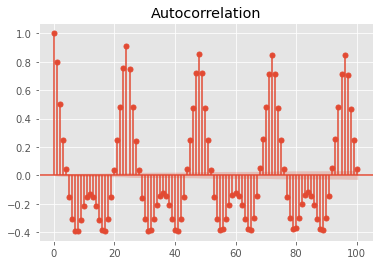

In [20]:
from statsmodels.graphics.tsaplots import plot_acf

aep_pct_change = AEP.pct_change()
aep_pct_change = aep_pct_change.dropna()

plot_acf(aep_pct_change, lags=100, alpha=0.05)
plt.show()